# <span style="color:firebrick"> Esercitazione 8 </span>

<span style="color:red">The variational principle in Quantum Mechanics states that the expectation value of the Hamiltonian over a (good) trial quantum state has the ground state energy $E_0$ as lower bound:
$$
\langle {\hat H} \rangle_T = 
\frac{\int dx \Psi^*_T(x) {\hat H} \Psi_T(x)}
{\int dx |\Psi_T(x)|^2} \ge E_0 =
\frac{\langle \Psi_0| {\hat H} | \Psi_0 \rangle}
{\langle \Psi_0 | \Psi_0 \rangle}
$$
During this exercise you will variationally optimize the ground state of a single quantum particle in a one dimensional (1D) space confined by the following external potential:
$$
V(x) = x^4 - \frac{5}{2}x^2
$$
This 1D quantum model is not analytically solvable and should be attacked by numerical methods. In order to obtain an approximate wave function for the ground state, the Variational Monte Carlo method uses a trial wave function, parametrized by a set of variational parameters. An approximate model for the ground state wave function is the following trial wave function:
$$
\Psi_T^{\sigma,\mu}(x) \propto e^{-\frac{(x-\mu)^2}{2\sigma^2}}+e^{-\frac{(x+\mu)^2}{2\sigma^2}}
$$
$\Psi_T^{\sigma,\mu}(x)$ depends on <span style="color:red">two variational parameters: $\sigma$ and $\mu$</span>.

Il principio variazionale dice che, per ogni funzione $\Psi_T$, l'energia variazionale $E_T$ è definita come:
$$
\langle {\hat H} \rangle_T = 
\frac{\int dx \Psi^*_T(x) {\hat H} \Psi_T(x)}
{\int dx |\Psi_T(x)|^2} \ge E_0 =
\frac{\langle \Psi_0| {\hat H} | \Psi_0 \rangle}
{\langle \Psi_0 | \Psi_0 \rangle}
$$
ed è un minimo quando $\Psi_T$ è la soluzione di ground state dell'equazione di Schrödinger, quando $\hat{H}$ è l'Hamiltoniana del sistema. Il metodo variazionale per trovare il gs consiste nel costruire una famiglia di funzioni $\Psi_T(a)$ e ottimizzare il vettore di parametri $a$ in modo tale che l'energia sia minimizzata per $a=a^*$. Quando si usa l'algoritmo di Metropolis per calcolare l'energia variazionale, si parla di **metodo variazionale Monte Carlo**. Dato un problema caratterizzato da un'Hamiltoniana $\hat{H}$ e data una funzione d'onda di prova $\Psi_T$, la valutazione dell'energia $E_T$ con la sua incertezza statistica viene calcolata tramite metodo Monte Carlo.

### Problemi di ottimizzazione
Sia $\vec{x}=(x_1,\dots,x_n)$ un vettore che assume valori in un certo dominio $X$, un generale problema di ottimizzazione può essere formalizzato come la minimizzazione delle funzioni costo $L_1(\vec{x}),\dots,L_I(\vec{x})$, soggette a vincoli di uguaglianza $h_j(x)=0$ con $j=\,\dots,J$ e di disuguaglianza $g_k(x)\leq 0$ con $k=\,\dots,K$. 

Esistono diversi tipi di ottimizzazione: **gradient based** se usano l'informazione di derivate, oppure **derivative free** se usano il valore della funzione stessa. Gli algoritmi possono inoltre essere **deterministici** oppure **stocastici**, ma in generale esistono moltissime varietà diverse di algoritmi di ottimizzazione, che possono essere adattati al problema specifico.

#### Gradient descent
Tra gli algoritmi più semplici e utilizzati vale la pena menzionare il **gradient descent**, che è una tecnica iterativa in cui a ogni passo (supposto che il gradiente sia diverso da zero), si sceglie come direzione di ricerca quella all'anti-gradiente $\vec{x}_{n+1}=\vec{x}_n-\gamma\vec{\nabla}L(\vec{x}_n)$. La dimensione degli step è determinata dal learning rate degli **iperparametri** ($\gamma$): se il learning rate è troppo piccolo l'algoritmo è inefficiente perchè ha bisogno di molte iterazioni per convergere. Se, al contrario, il learning rate è troppo grande, si possono avere difficoltà a convergere. Si tratta di un metodo preciso, ma locale, perchè se si parte da un punto poco favorevole è facile rimanere in un minimo locale e confonderlo con un minimo globale.

#### Stochastic gradient descent
A ogni step viene scelta una direzione in modo casuale e si calcola il gradiente solo lungo quella direzione. In questo modo l'algoritmo è più veloce perchè deve fare conti più semplici, e riduce il rischio di rimanere bloccato in un minimo locale. Tuttavia, a causa della natura stocastica, risulta meno regolare rispetto al metodo precedente (decresce solo in media, non a ogni step).

#### Random Search
La **Random Search** consiste nell'estrarre potenziali soluzioni in modo casuale e valutarle.

Il **No Free Lunch theorem** afferma che nessun algoritmo di ricerca è migliore di una Random Search nello spazio di tutti i possibili problemi.

Questo significa che un buon algoritmo di ricerca per un certo problema potrebbe non essere adatto a un altro, per questo è molto importante caratterizzare il problema specifico e scegliere l'approccio migliore.

#### Algoritmi metaeuristici
I metodi di ottimizzazione stocastici sono algoritmi di ottimizzazione che contengono elementi probabilistici nei dati del problema o nell'algoritmo stesso, o in entrambi. Gli algoritmi con componenti stocastiche vengono anche chiamati **metaeuristici**. Due caratteristiche importanti degli algoritmi metaeuristici sono:
- **diversificazione**, i.e. generazione di soluzioni diverse per esplorare tutto lo spazio di ricerca su una scala globale.
- **intensificazione**, i.e. concentrare la ricerca in una regione locale in cui si sospetta che ci sia una buona soluzione.
Esempi di algoritmi si questo tipo sono simulated annealing, parallel tempering, algoritmi genetici, ...

#### Simulated annealing
Il simulated annealing è un algoritmo che sfrutta un'analogia con la termodinamica: l'idea alla base è quella di replicare il modo in cui i liquidi cristallizzano. Ad alte temperature le molecole di un liquido si muovono liberamente l'una rispetto all'altra. Se la temperatura viene abbassata gradualmente, le molecole si riordinano man mano allineandosi fino a formare una struttura cristallina ordinata. Il cristallo è lo stato di minima energia del sistema. Questo non succede se il raffreddamento avviene in modo troppo veloce. Quindi il ground state viene raggiunto grazie a un raffreddamento _lento_.

L'idea del SA è quella di interpretare la funzione di costo $L(x)$ come l'energia di un sistema in meccanica statistica, e considerare la distribuzione di Boltzmann $p(x)=\exp{[-\beta L(x)]/Z}$. Si lascia variare $\beta$ nel tempo, si fanno $n_1$ mosse a temperatura $1/\beta_1$, $n_2$ mosse a temperatura $1/\beta_2$ e via dicendo, dove si sceglie la configurazione finale di ogni ciclo come configurazione iniziale del ciclo successivo. Nel limite di basse temperature ($\beta \to \infty$) la distribuzione si concentra nel minimo di $L(x)$. Matematicamente il processo è una catena di Markov dipendente dal tempo.
Data una specifica temperatura $t=1/\beta$, nella configurazione $x$ con energia $L(x)$, si genera una nuova configurazione $x'$ con energia $L(x')$ che rimpiazza la nuova configurazione con probabilità:
- $P=e^{-\beta(L(x')-L(x))}$ se $L(x')>L(x)$
- $P=1$ altrimenti

### <span style="color:firebrick"> Exercise 8.1 

<span style="color:red">Write a Variational Monte Carlo code for a single quantum particle in 1D which exploits the Metropolis algorithm to sample the square modulus of our trial wave function $|\Psi_T^{\sigma,\mu}(x)|^2$ using an uniform transition probability $T(x_{new}|x_{old})$. By using data blocking, the code should be able to compute the expectation value for the Hamiltonian
$$
\langle {\hat H} \rangle_T = 
\frac{\int dx \Psi^*_T(x) {\hat H} \Psi_T(x)}
{\int dx |\Psi_T(x)|^2} = 
\int dx \frac{|\Psi_T(x)|^2}{\int dx |\Psi_T(x)|^2} \frac{{\hat H} \Psi_T(x)}{\Psi_T(x)}
$$
which can be used to find the parameters that minimize this quantity. Use $\hbar = 1$ and $m=1$.
Note that to measure $\langle {\hat H} \rangle_T$ you need the analytical calculation of:
$$
\frac{{-\frac{\hbar^2}{2m}\frac{\partial^2}{\partial x^2}} \Psi_T^{\sigma,\mu}(x)}{\Psi_T^{\sigma,\mu}(x)}
$$

### <span style="color:firebrick"> Exercise 8.2
 <span style="color:red">To find the parameters $\sigma$ and $\mu$ which minimize $\langle {\hat H} \rangle_T$, extend your Variational Monte Carlo code to face the variational optimization problem via a Simulated Annealing (SA) algorithm.

 <span style="color:red">Choose an appropriate starting temperature for your SA algorithm and an appropriate temperature-update-law to make the optimization work.

 <span style="color:red">Compute $\langle {\hat H} \rangle_T$ with enough statistics in order to be able to measure the lowering of $\langle {\hat H} \rangle_T$ once the variational parameters are moved.

 - <span style="color:red">Show a picture of $\langle {\hat H} \rangle_T$ (with statistical uncertainties) as a function of the SA steps of the algorithm</span>
- <span style="color:red">you could also show a picture of the trajectory of the SA algorithm in the variational parameter space as a function of the SA steps </span>
- <span style="color:red">show a picture of the estimation of $\langle {\hat H} \rangle_T$ and its statistical uncertainty as a function of the number of blocks/MC steps for the set of parameters which minimize $\langle {\hat H} \rangle_T$</span>
- <span style="color:red">show also a picture **of the sampled** $|\Psi_T(x)|^2$ by filling a histogram with the sampled configurations, moreover compare it with the analytic curve of $|\Psi_T(x)|^2$ and with the numerical solution obtained by transforming the Schrodinger equation into a matrix equation (see below the supplementary material).

L’algoritmo utilizzato combina un campionamento Monte Carlo di tipo Metropolis con una procedura di Simulated Annealing (SA) per ottimizzare i parametri variazionali della funzione d’onda di prova. L’energia media del sistema, funzione dei parametri variazionali $(\mu, \sigma)$, viene stimata tramite un algoritmo Metropolis, mentre il Simulated Annealing è impiegato per minimizzarla esplorando lo spazio dei parametri.

#### Calcolo dell’energia media (Metropolis)
Per ogni coppia di parametri $(\mu, \sigma)$ l’energia media viene calcolata usando l'algoritmo Metropolis. I parametri del campionamento sono:
- Numero di passi Monte Carlo: $M = 10^5$
- Posizione iniziale della particella: $x_0=0$
- Ampiezza del passo Metropolis: $\Delta x \in [-2,2]$
  
Ad ogni passo viene proposta una nuova posizione $x' = x + \Delta x$ ed accettata con probabilità $\alpha = \min\left(1, \frac{|\psi(x')|^2}{|\psi(x)|^2}\right)$. Per ogni configurazione accettata viene calcolata l’energia locale $E(x)$, data dalla somma dei contributi cinetico e potenziale. L’energia media è infine ottenuta come media aritmetica su tutti i passi Monte Carlo.

#### Simulated Annealing
Il Simulated Annealing viene utilizzato per ottimizzare i parametri variazionali $(\mu, \sigma)$ minimizzando l’energia media calcolata con Metropolis. I valori iniziali dei parametri sono $(\mu_{\text{start}},\sigma_{\text{start}}) = (1.0,1.0)$. Il numero totale di temperature considerate è $N_T=200$ e la temperatura segue la legge di raffreddamento:
$$
T_i = \frac{3}{1 + 4i}, \quad i = 0, \dots, N_T - 1
$$
e per ogni temperatura vengono effettuati $20$ cicli di aggiornamento dei parametri. Ad ogni ciclo vengono proposti nuovi valori di $(\mu, \sigma)$ secondo: $\mu' = \mu + \delta_\mu, \quad \sigma' = \sigma + \delta_\sigma,$ con $\delta_\mu, \delta_\sigma$ estratti uniformemente nell’intervallo $[-\text{step}, \text{step}]$. Il nuovo set di parametri viene accettato con probabilità:
$$
P = \min\left(1, e^{-\frac{E_{\text{new}} - E_{\text{old}}}{T}}\right),
$$
dove $E_{\text{old}}$ ed $E_{\text{new}}$ sono rispettivamente l’energia media prima e dopo la variazione dei parametri. Questo criterio permette di accettare configurazioni energeticamente sfavorevoli alle alte temperature, favorendo l’esplorazione globale dello spazio dei parametri. L’ampiezza del passo nello spazio dei parametri è inizialmente fissata a $\text{step} = 0.5$. Alla fine di ogni temperatura, il passo viene adattato in base al tasso di accettazione:
- se l’accettanza è inferiore al $40\%$, il passo viene ridotto del $10\%$;
- se l’accettanza è superiore al $60\%$, il passo viene aumentato del $10\%$.

Il valore del passo è inoltre limitato all’intervallo $0.01 < \text{step} < 2.0$ per garantire stabilità ed efficienza dell’algoritmo.

Per ogni configurazione accettata dal Simulated Annealing vengono salvati su file $T$, $\mu$, $\sigma$ e l'energia media associata calcolata senza data blocking per rendere il codice più veloce. Di conseguenza bisogna tenere in considerazione che il valore più basso di energia non necessariamente corrisponde ai parametri migliori perchè potrebbero esserci delle fluttuazioni.

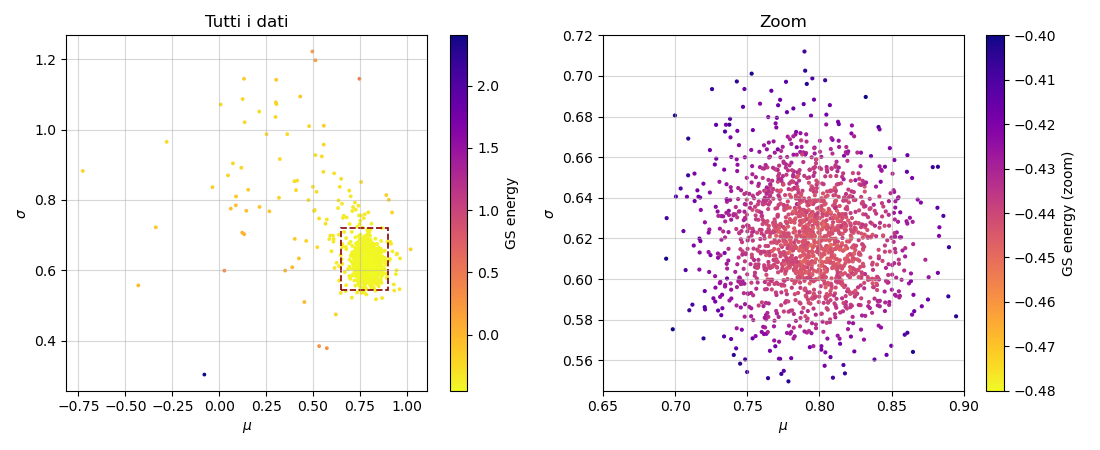

In [35]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# Carica i dati
data = np.loadtxt("output_SA.txt")
mu = data[:, 1]
sigma = data[:, 2]
energia = data[:, 3]

# Definisci i range per lo zoom
mu_range = (0.65, 0.9)
sigma_range = (0.545, 0.72)
energia_range = (-0.48, -0.40)

# Maschera per selezionare solo i dati nello zoom
mask = (
    (mu >= mu_range[0]) & (mu <= mu_range[1]) &
    (sigma >= sigma_range[0]) & (sigma <= sigma_range[1]) &
    (energia >= energia_range[0]) & (energia <= energia_range[1])
)

# Crea figura con 2 subplot affiancati (niente sharey)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(11, 4.5))

# --- Grafico completo ---
sc1 = ax1.scatter(mu, sigma, c=energia, cmap='plasma_r', s=3)
ax1.set_title('Tutti i dati')
ax1.set_xlabel(r"$\mu$")
ax1.set_ylabel(r"$\sigma$")
ax1.grid(True,alpha=0.5)

# Rettangolo per indicare la zona zoomata
rect = patches.Rectangle(
    (mu_range[0], sigma_range[0]),
    mu_range[1] - mu_range[0],
    sigma_range[1] - sigma_range[0],
    linewidth=1.2, edgecolor='darkred', facecolor='none', linestyle='--'
)
ax1.add_patch(rect)

# Colorbar per il primo grafico
cbar = fig.colorbar(sc1, ax=ax1)
cbar.set_label('GS energy')

# --- Grafico zoomato ---
sc2 = ax2.scatter(mu[mask], sigma[mask], c=energia[mask], cmap='plasma_r', s=4,
                  vmin=energia_range[0], vmax=energia_range[1])
ax2.set_title('Zoom')
ax2.set_xlabel(r"$\mu$")
ax2.set_ylabel(r"$\sigma$")
ax2.set_xlim(mu_range)
ax2.set_ylim(sigma_range)
ax2.grid(True,alpha=0.5)

# Colorbar per il secondo grafico
cbar2 = fig.colorbar(sc2, ax=ax2)
cbar2.set_label('GS energy (zoom)')

plt.tight_layout()
plt.show()


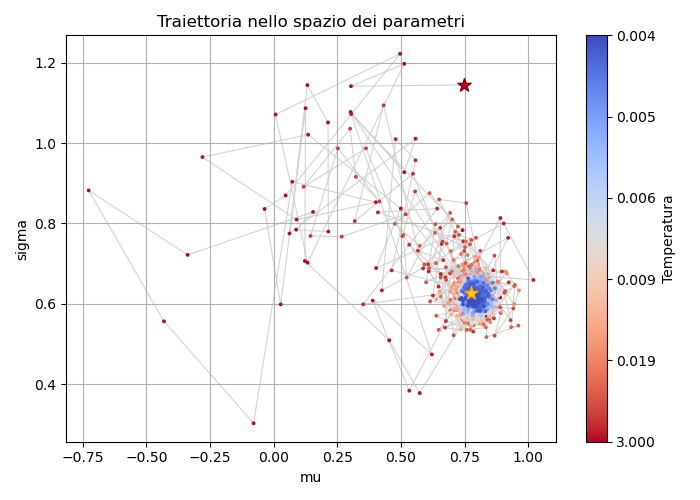

In [24]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize

# Carica i dati
data = np.loadtxt("output_SA.txt")
T = data[:, 0]
mu = data[:, 1]
sigma = data[:, 2]

# Scala visiva per linearizzare i colori (inverso della temperatura)
T_scaled = 1 / T
norm = Normalize(vmin=np.min(T_scaled), vmax=np.max(T_scaled))

# Plot
fig, ax1 = plt.subplots(figsize=(7, 5))

# Linea che unisce i punti
ax1.plot(mu, sigma, color='lightgray', linewidth=0.8, zorder=1)

# Scatter colorato
sc1 = ax1.scatter(mu, sigma, c=T_scaled, cmap='coolwarm_r', s=3, norm=norm, zorder=2)

# Stelle per inizio e fine percorso
ax1.scatter(mu[0], sigma[0], marker='*', s=100, color=plt.cm.coolwarm_r(norm(T_scaled[0])), edgecolor='darkred', zorder=3)
ax1.scatter(mu[-1], sigma[-1], marker='*', s=100, color='gold', edgecolor='orange', zorder=3)

# Titoli e assi
ax1.set_title('Traiettoria nello spazio dei parametri')
ax1.set_xlabel('mu')
ax1.set_ylabel('sigma')
ax1.grid(True)

# Colorbar
cbar = plt.colorbar(sc1, ax=ax1)
cbar.set_label('Temperatura')
# Tick personalizzati con valori reali
ticks_scaled = np.linspace(np.min(T_scaled), np.max(T_scaled), 6)
ticks_real = 1 / ticks_scaled
# Ordina i tick in modo che le T alte siano in alto
cbar.set_ticks(ticks_scaled[::-1])
cbar.set_ticklabels([f"{val:.3f}" for val in ticks_real[::-1]])

plt.tight_layout()
plt.show()



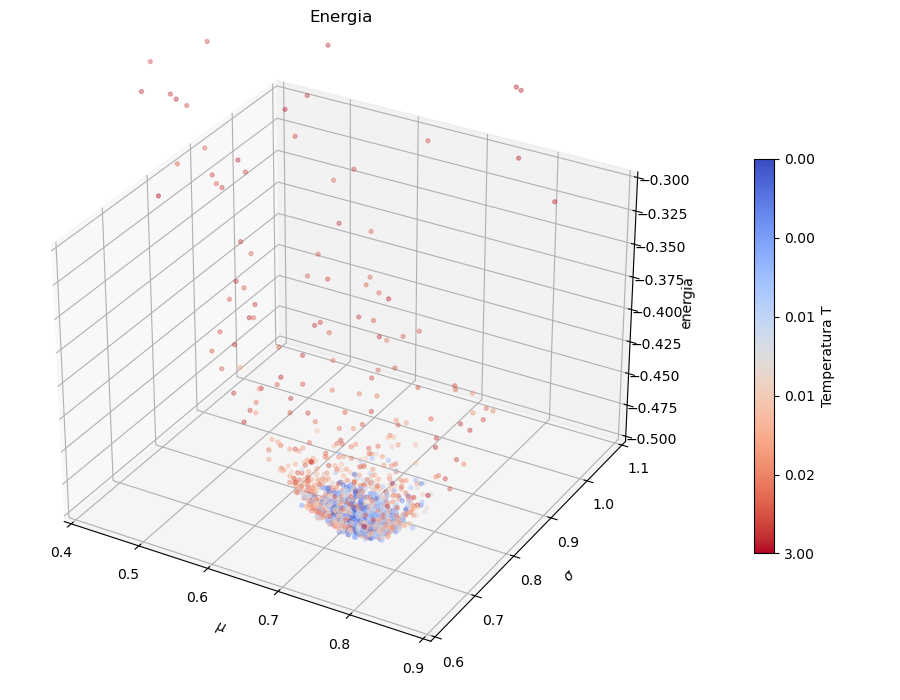

In [48]:
%matplotlib widget
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.colors import Normalize

# Caricamento dati
data = np.loadtxt("output_SA.txt")
T_raw = data[:, 0]
mu = data[:, 1]
sigma = data[:, 2]
energia = data[:, 3]

# Temperatura trasformata (es. T_scaled = 1/T oppure altra legge)
T_scaled = 1 / T_raw
norm = Normalize(vmin=np.min(T_scaled), vmax=np.max(T_scaled))

# Crea figura 3D
fig = plt.figure(figsize=(9, 7))
ax = fig.add_subplot(111, projection='3d')

# Scatter colorato per T_scaled
sc = ax.scatter(mu, sigma, energia, c=T_scaled, cmap=cm.coolwarm_r, s=8)

# Etichette assi
ax.set_xlabel(r"$\mu$")
ax.set_ylabel(r"$\sigma$")
ax.set_zlabel('energia')
ax.set_title('Energia')

# Limiti assi
ax.set_xlim(0.4, 0.9)
ax.set_ylim(0.6, 1.1)
ax.set_zlim(-0.5, -0.3)

# Colorbar con etichette in T_raw (reali)
cbar = fig.colorbar(sc, ax=ax, shrink=0.6, pad=0.1)
cbar.set_label('Temperatura T')

# Etichette personalizzate
ticks_scaled = np.linspace(np.min(T_scaled), np.max(T_scaled), 6)
ticks_real = 1 / ticks_scaled
cbar.set_ticks(ticks_scaled)
cbar.set_ticklabels([f"{t:.2f}" for t in ticks_real])

plt.tight_layout()
plt.show()

Per una sequenza di parametri variazionali $(\mu,\sigma)$ ottenuti tramite Simulated Annealing si calcolano energia media ed errore statistico sfruttando l'algoritmo di Metropolis e il data blocking. I valori dei parametri $(\mu,\sigma)$ vengono letti dal file`output_SA.txt` che contiene, per ogni configurazione accettata durante il Simulated Annealing:
- temperatura
- valore di $\mu$
- valore di $\sigma$
- energia associata (calcolata senza data blocking)

Per ciascuna coppia $(\mu,\sigma)$ accettata viene eseguita una simulazione Metropolis con $M = 10^4$ passi Monte Carlo divisi in $N = 100$ blocchi
da $L = M / N = 100 $ passi. La posizione iniziale: $x_0 = 0$ e l'ampiezza del passo Metropolis $\Delta x$ è estratta uniformemente nell'intervallo $[−2.2, 2.2]$.

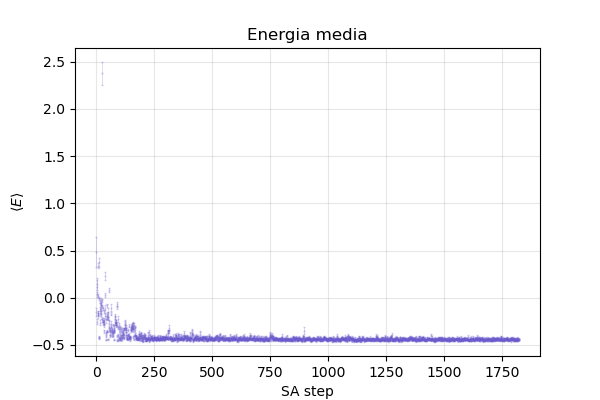

In [43]:
import numpy as np
import matplotlib.pyplot as plt

# Carica i dati
data = np.loadtxt("output_energie.txt") 
lanci = data[:, 0]  # prima colonna
media = data[:, 1]  # seconda colonna
err = data[:, 2]    # terza colonna

plt.figure(figsize=(6, 4))  

# energia media in funzione dello step SA
plt.errorbar(lanci, media, yerr=err, fmt='.', color='slateblue', ecolor='slateblue', alpha=0.3, elinewidth=0.5, capsize=1, markersize=1)
plt.xlabel("SA step") 
plt.ylabel(r"$\langle E \rangle$")
plt.title("Energia media")
plt.grid(True, alpha=0.3)



Dai parametri trovati usando il SA $(\mu_{\text{best}}, \sigma_{\text{best}})=(0.772965,0.627109)$ si stimano l'energia del GS con il relativo errore statistico usando il data blocking. Vengono fatte $M = 10^5$ estrazioni Monte Carlo suddivise in $N = 100$ da $L = M / N = 10^3$ passi per blocco. La posizione iniziale della particella è $x_0 = 0$ e il passo scelto è $\text{passo}=2.4$, con cui si ottiene un'accettanza pari al $54\%$. Prima di registrare i dati vengono fatti $N_{\text{therma}}=5000$ step (Metropolis campiona correttamente la distribuzione target asintoticamente).

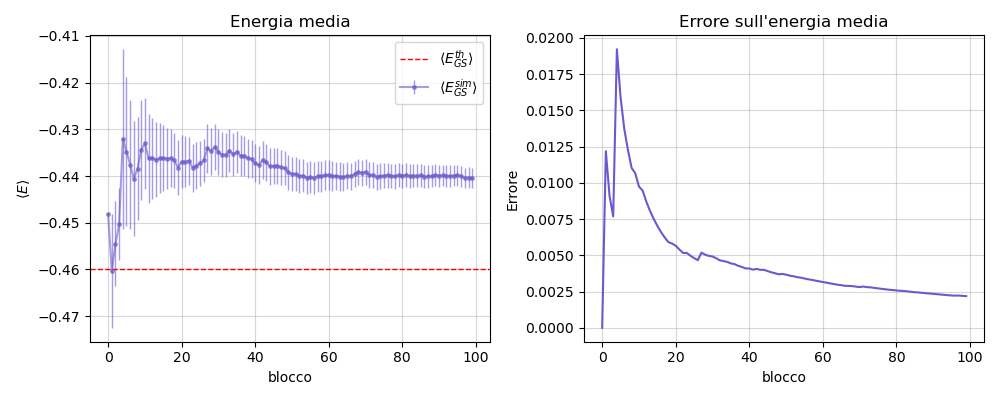

In [38]:
import numpy as np
import matplotlib.pyplot as plt

# Carica i dati
data = np.loadtxt("output_s.txt") 
lanci = data[:, 0]  # prima colonna
media = data[:, 1]  # seconda colonna
err = data[:, 2]    # terza colonna

plt.figure(figsize=(10, 4))  

# Primo subplot (a sinistra): energia media
plt.subplot(1, 2, 1)
plt.errorbar(lanci/1000, media, yerr=err, fmt='.-', alpha=0.6, color='slateblue',markersize=5, elinewidth=1, label=r"$\langle E_{GS}^{sim} \rangle$")
plt.axhline(y=-0.46, color='red', linestyle='--', linewidth=1, label=r"$\langle E_{GS}^{th} \rangle$")
plt.xlabel("blocco") 
plt.ylabel(r"$\langle E \rangle$")
plt.title("Energia media")
plt.legend()
plt.grid(True,alpha=0.5)

# Secondo subplot (a destra): errore
plt.subplot(1, 2, 2)
plt.plot(lanci/1000, err, color='slateblue')
plt.xlabel("blocco") 
plt.ylabel("Errore")
plt.title("Errore sull'energia media")
plt.grid(True,alpha=0.5)

plt.tight_layout()
plt.show()

Ground state energy:  -0.46046587969259045


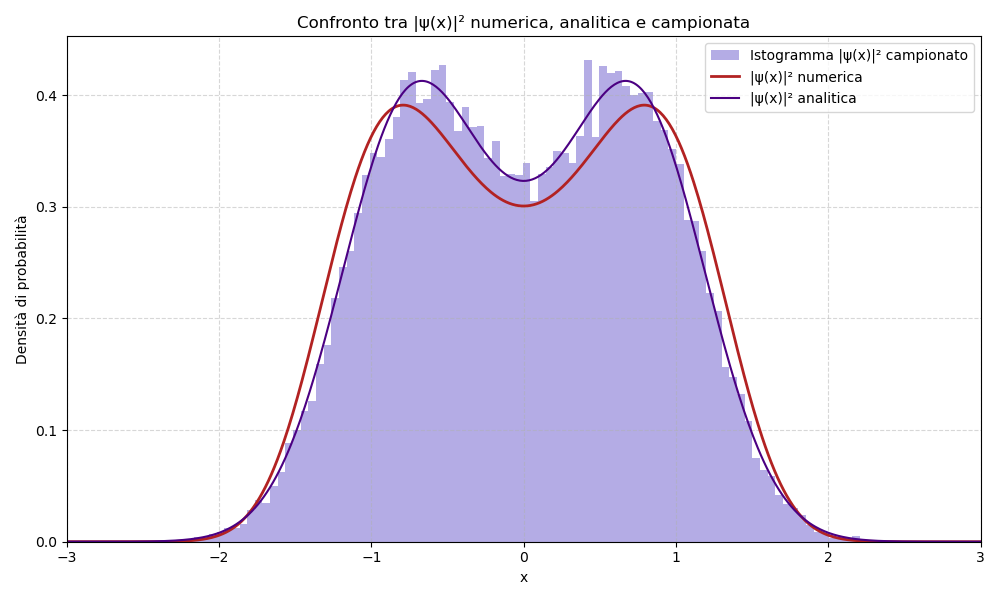

In [40]:
import matplotlib.pyplot as plt
import numpy as np

# Caricamento dati
data = np.loadtxt("output_wf.txt")
wf = data[:, 1]  # seconda colonna

best_mu = 0.772965
best_sigma = 0.627109

def Vpot(x):
    return (x**2 - 2.5)*x**2
    #return 0.5*x**2

def PsiSquare(x):
    return (np.exp(-(x-best_mu)**2/(2.0 * best_sigma**2)) + np.exp(-(x+best_mu)**2/(2.0 * best_sigma**2)))**2


# Parametri fisici e numerici
hbar = 1
m = 1
a = 10
N = 1000

x = np.linspace(-a/2, a/2, N)
dx = x[1] - x[0]
V = Vpot(x)

# Derivata seconda centrata
CDiff = np.diag(np.ones(N-1), -1) - 2*np.diag(np.ones(N), 0) + np.diag(np.ones(N-1), 1)

# Hamiltoniana
H = (-(hbar**2)*CDiff)/(2*m*dx**2) + np.diag(V)

# Autovalori e autovettori
E, psi = np.linalg.eigh(H)

# Normalizzazione
psi = np.transpose(psi)
psi = psi / np.sqrt(dx)  # normalizza con dx

mask = (x > -3) & (x < 3)
psi2 = PsiSquare(x)
psi2 /= np.trapz(psi2[mask], x[mask])

print("Ground state energy: ", E[0])

# === Grafico combinato ===
plt.figure(figsize=(10, 6))

# Istogramma normalizzato
plt.hist(wf, bins=100, density=True, color='slateblue', alpha=0.5, label='Istogramma |ψ(x)|² campionato')

# Densità di probabilità teorica
plt.plot(x, (psi[0])**2, color='firebrick', linewidth=2, label='|ψ(x)|² numerica')
plt.plot(x, psi2, color = 'indigo', alpha=1, label='|ψ(x)|² analitica')


plt.title("Confronto tra |ψ(x)|² numerica, analitica e campionata")
plt.xlabel("x")
plt.ylabel("Densità di probabilità")
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend()
plt.xlim(-3, 3)

plt.tight_layout()
plt.show()


### <span style="color:green">Supplementary material</span>

How can we describe a wave function as a vector? We set up a lattice of discrete points, spaced by a constant distance $dx$, and record the value of the function at each lattice point. In this way the wave function, $\Psi(x)$ become a vector:

$$
\Psi(x) \to \left[ \Psi(x_1), \Psi(x_2), ..., \Psi(x_N) \right] = 
\left[ \Psi_1, \Psi_2, ..., \Psi_N \right]
$$

The time independent Schrodinger equation 

$$
{\hat H} \Psi(x) = \left( -\frac{\hbar^2}{2m}\frac{\partial^2}{\partial x^2} + V(x) \right) \Psi(x) = E \Psi(x)
$$

can be written in matrix form. But how do we write the second derivative at a particular point? Let's start with the first derivatives:
$$
\frac{\partial}{\partial x} \Psi\left(x=(x_i+x_{i+1})/2\right) \simeq \frac{\Psi_{i+1}-\Psi_{i}}{dx}\\
\frac{\partial}{\partial x} \Psi\left(x=(x_i+x_{i-1})/2\right) \simeq \frac{\Psi_{i}-\Psi_{i-1}}{dx}
$$

Thus, we can discretize the second derivative in the following way:
$$
\frac{\partial^2}{\partial x^2} \Psi(x=x_i) =
\frac{\frac{\partial}{\partial x} \Psi\left(x=(x_i+x_{i+1})/2\right) - \frac{\partial}{\partial x} \Psi\left(x=(x_i+x_{i-1})/2\right)}{dx} =
\frac{\Psi_{i+1}-2\Psi_{i}+\Psi_{i-1}}{dx^2}
$$

We finally obtain:

$$
\begin{bmatrix}
 \frac{\hbar^2}{m\,dx^2}+V(x_1)& -\frac{\hbar^2}{2m\,dx^2} & 0 & \dots  & 0 \\
-\frac{\hbar^2}{2m\,dx^2} & \frac{\hbar^2}{m\,dx^2}+V(x_2) & -\frac{\hbar^2}{2m\,dx^2} & \dots  & 0 \\
 0                        & -\frac{\hbar^2}{2m\,dx^2} & \frac{\hbar^2}{m\,dx^2}+V(x_3) & \dots  & 0 \\
 \vdots                   & \vdots                    & \vdots & \ddots & \vdots \\
 0                    & 0                & 0 & \dots  & \frac{\hbar^2}{m\,dx^2}+V(x_N)
\end{bmatrix}
\begin{bmatrix}
\Psi_{1} \\
\Psi_{2} \\
\vdots \\
\Psi_{N}
\end{bmatrix}
= E
\begin{bmatrix}
\Psi_{1} \\
\Psi_{2} \\
\vdots \\
\Psi_{N}
\end{bmatrix}
$$

To solve the time independent Schrodinger equation we therefore have to find eigenstates and eigenvalues of the matrix just obtained.